In [27]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [28]:
import sys
sys.path.append('..')
from misc.experiment_loader import *
import matplotlib

In [29]:
folder_path = '../results/cifar100/vgg19bn_/best_results_cifar_10/'
full_experiment = FullExperiment(folder_path=folder_path)


In [30]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}


matplotlib.rc('font', **font)

matplotlib.pyplot.rcParams['lines.linewidth'] = 1.5
matplotlib.pyplot.rcParams['axes.linewidth'] = 1.5



sgd_experiments = full_experiment.filter_parameters({'training_method': 'sgd',
                                                    'learning_method':'constant'})

sgd_no_momentum = sgd_experiments.filter_parameters({'sgd_momentum':False})

sgd_momentum = sgd_experiments.filter_parameters({'sgd_momentum':0.9,
                                                  'sgd_nesterov':False})

sgd_nesterov = sgd_experiments.filter_parameters({'sgd_momentum':0.9,
                                                  'sgd_nesterov':True})

adam_experiments = full_experiment.filter_parameters({'training_method': 'adam',
                                                    'learning_method':'constant'})

adam_normal = adam_experiments.filter_parameters({'adam_amsgrad':False})

adam_amsgrad = adam_experiments.filter_parameters({'adam_amsgrad':True})


rmsprop_experiments = full_experiment.filter_parameters({'training_method': 'rmsprop',
                                                    'learning_method':'constant'})

rmsprop_normal = rmsprop_experiments.filter_parameters({'rmsprop_centered':False})

rmsprop_centered = rmsprop_experiments.filter_parameters({'rmsprop_centered':True})


adagrad_experiments = full_experiment.filter_parameters({'training_method': 'adagrad'})


tas_experiments = full_experiment.filter_parameters({'training_method': 'sgd',
                                                    'learning_method':'tas'})

# tas_100 = tas_experiments.filter_parameters({'epochs':100})
# tas_100.list = tas_100.list[9:]
# tas_10 = tas_experiments.filter_parameters({'epochs':10})
# tas_25 = tas_experiments.filter_parameters({'epochs':25})


sgd_no_momentum.sort_by_results('val_acc1', 'max_mean', reverse=True)

sgd_momentum.sort_by_results('val_acc1', 'max_mean', reverse=True)
sgd_nesterov.sort_by_results('val_acc1', 'max_mean', reverse=True)
adam_amsgrad.sort_by_results('val_acc1', 'max_mean', reverse=True)
adam_normal.sort_by_results('val_acc1', 'max_mean', reverse=True)
rmsprop_normal.sort_by_results('val_acc1', 'max_mean', reverse=True)
rmsprop_centered.sort_by_results('val_acc1', 'max_mean', reverse=True)

sgd_experiments.sort_by_results('val_acc1', 'max_mean', reverse=True)
adagrad_experiments.sort_by_results('val_acc1', 'max_mean', reverse=True)
adam_experiments.sort_by_results('val_acc1', 'max_mean', reverse=True)
rmsprop_experiments.sort_by_results('val_acc1', 'max_mean', reverse=True)
# tas_100.sort_by_results('val_acc1', 'max_mean', reverse=True)
# tas_10.sort_by_results('val_acc1', 'max_mean', reverse=True)
# tas_25.sort_by_results('val_acc1', 'max_mean', reverse=True)

# best_list_sgd = [sgd_no_momentum.list[0], sgd_momentum.list[0], sgd_nesterov.list[0]]

# best_list_adam = [adam_normal.list[0], adam_amsgrad.list[0]]

# best_list_rmsprop = [rmsprop_normal.list[0], rmsprop_centered.list[0]]

best_list = [sgd_experiments.list[0], 
             adagrad_experiments.list[0], 
             adam_experiments.list[0], 
             rmsprop_experiments.list[0],
             tas_experiments.list[0]]


# experiments_list = [sgd_experiments, rmsprop_experiments, adagrad_experiments, adam_experiments, tas_25]
# best_list = []
# for experiments in experiments_list:
#     experiments.sort_by_results('val_acc1', 'max_mean', reverse=True, epoch_limit=25)
#     best_list.append(experiments.list[0])


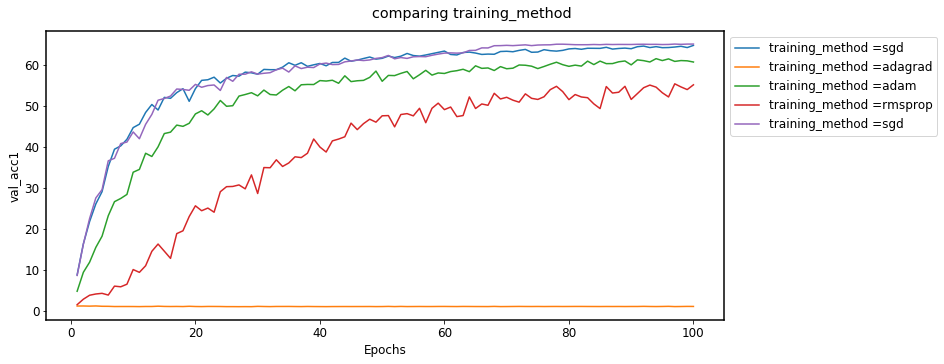

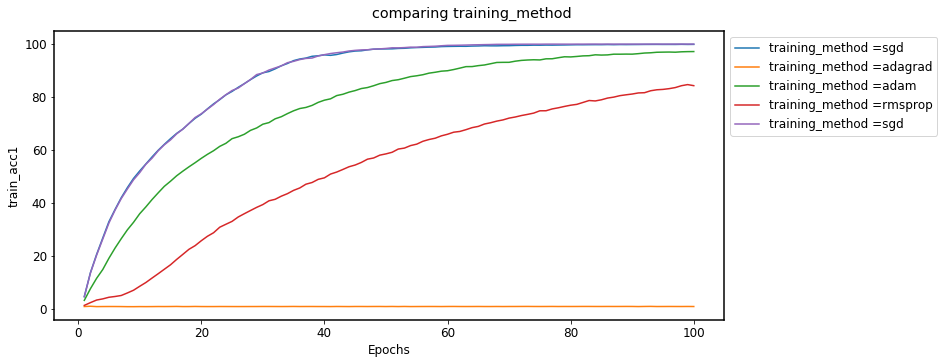

In [31]:
best_experiments = FullExperiment(experiment_list=best_list)
fig1, ax1 = best_experiments.plot_compare_graph(parameters_to_compare=['training_method'], result_to_compare='val_acc1')
fig2, ax2 = best_experiments.plot_compare_graph(parameters_to_compare=['training_method'], result_to_compare='train_acc1')
# fig, ax = best_experiments.plot_compare_graph(parameters_to_compare=['training_method'], result_to_compare='learning_rate')

In [32]:
lines = ax1.lines
for line in lines:
    ax2.plot(line.get_xdata(), line.get_ydata(), color=line.get_color(), linestyle='--')


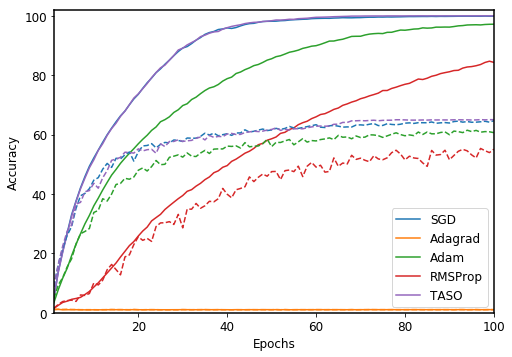

In [34]:
ax2.legend(['SGD','Adagrad', 'Adam', 'RMSProp', 'TASO'])
fig2.set_size_inches(7,5)
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_ylim(0,102)
ax2.set_xlim(1,100)
fig2.suptitle('')
plt.setp(ax2.spines.values(), linewidth=1.5)
fig2

In [49]:
alpha_list = [10, 25, 50]
beta_list = [0.3, 0.5, 0.7]
string_list = []

for alpha in alpha_list:
    for beta in beta_list:
        string_list.append(r'$\alpha={}$ and $\beta={}$'.format(alpha,beta))

colors_list = ['#1f77b4', '#ff7f03', '#2ca02c']    
styles_list = ['-', '--', '-.']
        
for ii,line in enumerate(ax.lines):
    line.set_color(colors_list[ii//3])
    line.set_linestyle(styles_list[ii%3])

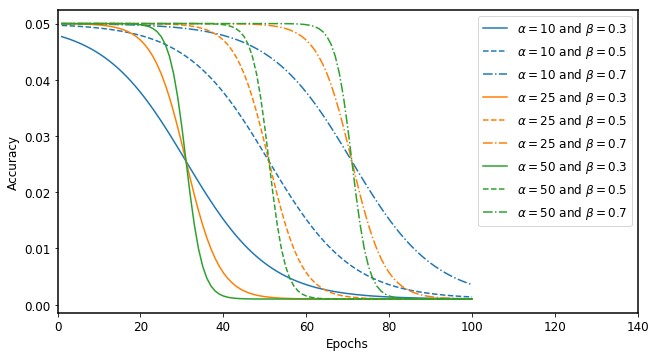

In [50]:
ax.legend(labels=string_list)
fig.set_size_inches(9,5)
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
fig.suptitle('')
plt.setp(ax.spines.values(), linewidth=1.5)
ax.set_xlim(0,140)
fig

In [26]:
fig2.savefig('test.pdf', format='pdf', bbox_inches='tight')

In [51]:
fig.savefig('test.pdf', format='pdf', bbox_inches='tight')